In [193]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [194]:
df=pd.read_csv('puntos1.txt',sep='\t',header=None, names=['X','Y'])
df['index']=range(1,101)

In [195]:
lista=[]
while(df.shape[0]>0):
    long=df.shape[0]
    df['fitness']=0
    for i in range(long):
        mask = (df['X']>df.iloc[i]['X'])&(df['Y']>df.iloc[i]['Y'])
        df.ix[mask, 'fitness'] = df.ix[mask, 'fitness'] + 1
    df['fitness']=long-df['fitness']
    print("###################### Frontera")
    print(df[df['fitness']==long])
    lista.append(df[df['fitness']==long])
    df=df[df['fitness']!=long]
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


###################### Frontera
           X         Y  index  fitness
4   0.036730  4.945603      5      100
13  0.684680  2.807025     14      100
28  0.079723  4.758752     29      100
33  0.080068  4.617661     34      100
40  0.618137  2.871139     41      100
42  0.909228  2.729249     43      100
45  0.865584  2.762248     46      100
62  0.094610  4.521896     63      100
74  0.168070  3.530449     75      100
76  0.616903  2.972467     77      100
78  0.015448  5.407106     79      100
80  0.108646  4.416310     81      100
88  0.412970  3.101681     89      100
89  0.150436  3.939780     90      100
93  0.137187  4.310392     94      100
###################### Frontera
           X         Y  index  fitness
0   0.228765  4.024265      1       85
7   0.221580  4.395959      8       85
12  0.440901  3.308089     13       85
17  0.333847  3.733722     18       85
21  0.162657  4.506514     22       85
27  0.519903  3.256635     28       85
35  0.580618  3.239957     36       85


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


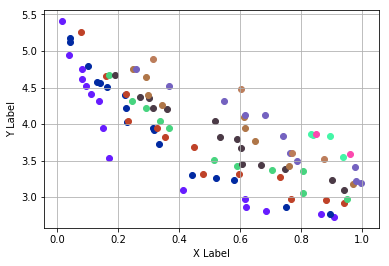

In [196]:
import matplotlib.cm as cm
fig = plt.figure()
ax = fig.add_subplot(111)

pareto=df[df['fitness']==100]

# The colormap
cmap = cm.jet

for front,c in zip(lista,np.linspace(0, 10, float(len(lista)))):
    ax.scatter(front['X'], front['Y'], facecolors=np.random.random((1, 3)), marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid(True)
plt.show()

# Hypervolum

In [197]:
pareto=lista[0]
pareto=pareto.sort_values(['X'], ascending=[True])
pareto

X         Y  index  fitness
78  0.015448  5.407106     79      100
4   0.036730  4.945603      5      100
28  0.079723  4.758752     29      100
33  0.080068  4.617661     34      100
62  0.094610  4.521896     63      100
80  0.108646  4.416310     81      100
93  0.137187  4.310392     94      100
89  0.150436  3.939780     90      100
74  0.168070  3.530449     75      100
88  0.412970  3.101681     89      100
76  0.616903  2.972467     77      100
40  0.618137  2.871139     41      100
13  0.684680  2.807025     14      100
45  0.865584  2.762248     46      100
42  0.909228  2.729249     43      100

In [198]:
temX=0
hpv=0.0
for i in range(pareto.shape[0]):
    hpv=hpv+float(pareto.iloc[i]['X']-temX)*float(pareto.iloc[i]['Y'])
    temX=pareto.iloc[i]['X']
print(hpv)

2.935123537590724
